# Ejercicio: Análisis de Regresión con el Dataset Wine Quality

## Descripción del Dataset

El dataset **Wine Quality** contiene resultados de análisis fisicoquímicos de vinos portugueses "Vinho Verde" y su calidad evaluada por expertos. El objetivo es predecir la calidad del vino basándose en sus propiedades químicas.

### Variables del dataset:
- **fixed acidity**: Acidez fija (g/L de ácido tartárico)
- **volatile acidity**: Acidez volátil (g/L de ácido acético)
- **citric acid**: Ácido cítrico (g/L)
- **residual sugar**: Azúcar residual (g/L)
- **chlorides**: Cloruros (g/L de cloruro de sodio)
- **free sulfur dioxide**: Dióxido de azufre libre (mg/L)
- **total sulfur dioxide**: Dióxido de azufre total (mg/L)
- **density**: Densidad (g/cm³)
- **pH**: pH del vino
- **sulphates**: Sulfatos (g/L de sulfato de potasio)
- **alcohol**: Contenido de alcohol (% vol)
- **quality**: Calidad del vino (puntuación de 0-10) - **Variable objetivo**

En este ejercicio, trabajarás con el dataset de vinos tintos y aplicarás diferentes técnicas de regresión para predecir la calidad del vino.

## 1. Importar librerías y cargar datos

In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [2]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. Análisis Exploratorio de Datos (EDA)

### Ejercicio 2.1: Exploración inicial
Completa el análisis exploratorio inicial del dataset.

In [3]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# TODO: Muestra la información general del dataset (tipos de datos, valores no nulos)
# Tu código aquí
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# TODO: Calcula y muestra las estadísticas descriptivas del dataset
# Tu código aquí
wine_data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [6]:
# TODO: Verifica si hay valores nulos en el dataset
# Tu código aquí
print("Valores nulos por columna:")
print(wine_data.isnull().sum())

Valores nulos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Ejercicio 2.2: Análisis de la variable objetivo

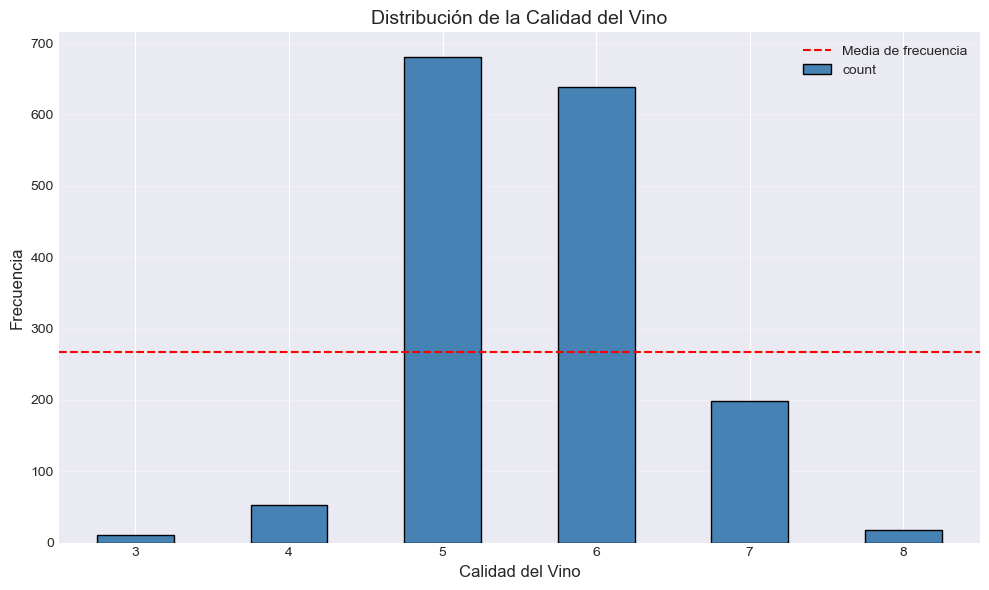

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [7]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

### Ejercicio 2.3: Matriz de correlación


Matriz de correlación:
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000            -0.256        0.672   
volatile acidity             -0.256             1.000       -0.552   
citric acid                   0.672            -0.552        1.000   
residual sugar                0.115             0.002        0.144   
chlorides                     0.094             0.061        0.204   
free sulfur dioxide          -0.154            -0.011       -0.061   
total sulfur dioxide         -0.113             0.076        0.036   
density                       0.668             0.022        0.365   
pH                           -0.683             0.235       -0.542   
sulphates                     0.183            -0.261        0.313   
alcohol                      -0.062            -0.202        0.110   
quality                       0.124            -0.391        0.226   

                      residual sugar  chlorides  free sulfur diox

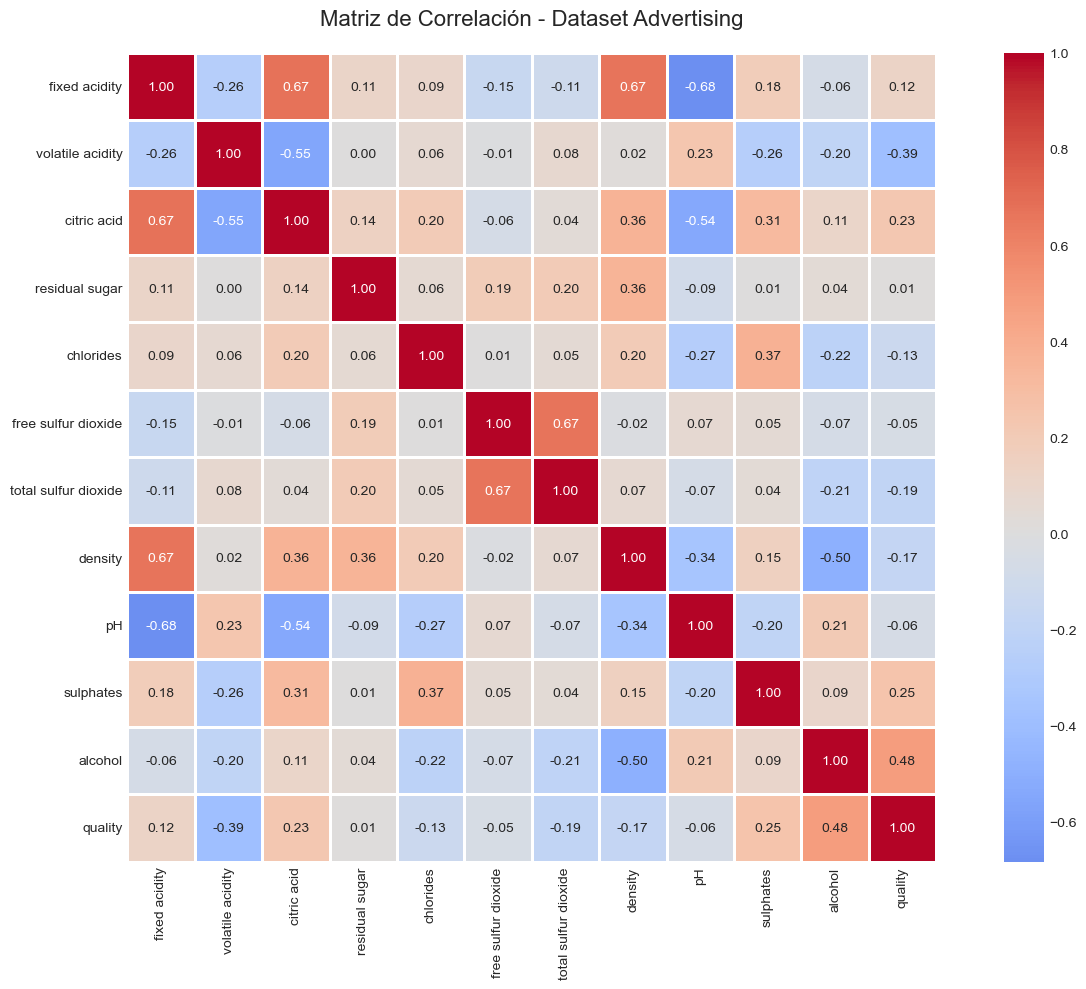

In [8]:
# TODO: Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
# Tu código aquí

# Matriz de correlación
correlation_matrix = wine_data.corr()
print("\nMatriz de correlación:")
print(correlation_matrix.round(3))
plt.figure(figsize=(14, 10))

# Completa el código para crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Matriz de Correlación - Dataset Advertising', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


In [9]:
# TODO: Identifica y muestra las 5 variables más correlacionadas con 'quality'
# Tu código aquí
correlaciones = correlation_matrix['quality'].drop(labels ='quality',axis = 0,inplace=False)
corrs = np.abs(correlaciones).nlargest(5).index
resultados = correlaciones.loc[corrs].sort_values(key=lambda x: x.abs(), ascending=False)
print("Las 5 variables más correlacionadas con 'quality' son:")
print(resultados)

Las 5 variables más correlacionadas con 'quality' son:
alcohol                 0.476166
volatile acidity       -0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide   -0.185100
Name: quality, dtype: float64


### Ejercicio 2.4: Visualización de relaciones

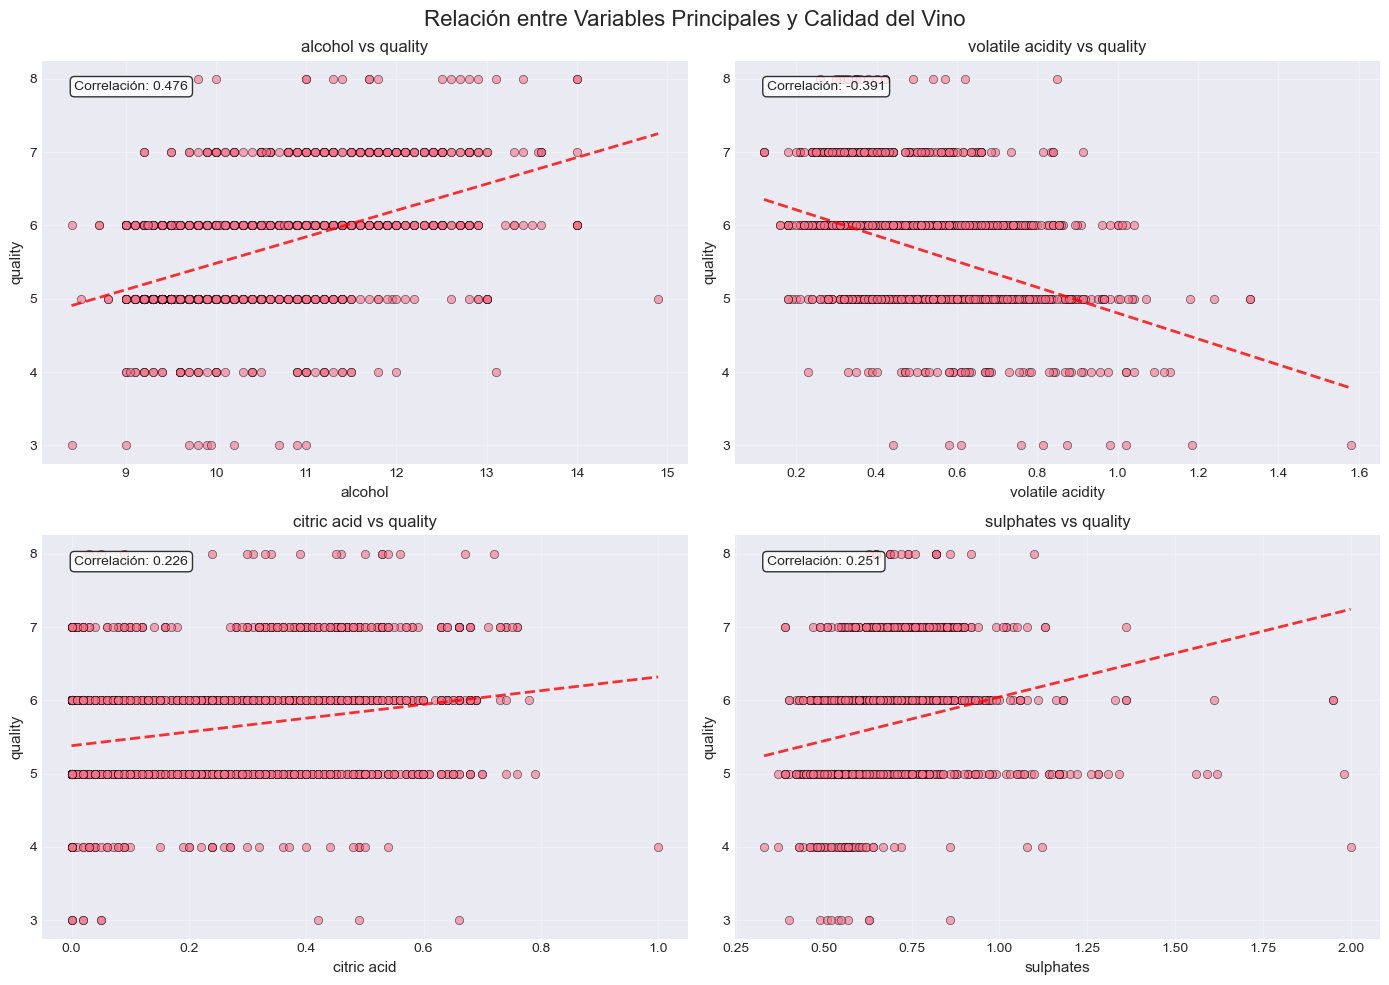

In [10]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # TODO: Crea un scatter plot para cada variable vs quality
    # Agrega una línea de tendencia
    # Tu código aquí
    ax.scatter(wine_data[feature], wine_data['quality'], alpha=0.6, edgecolors='black', linewidth=0.5)
    ax.set_xlabel(f'{feature}', fontsize=11)
    ax.set_ylabel('quality', fontsize=11)
    ax.set_title(f'{feature} vs quality', fontsize=12)
    ax.grid(True, alpha=0.3)
    
    # Agregar línea de tendencia
    z = np.polyfit(wine_data[feature], wine_data['quality'], 1)
    p = np.poly1d(z)
    ax.plot(wine_data[feature].sort_values(), p(wine_data[feature].sort_values()), 
            "r--", alpha=0.8, linewidth=2)
    
    # Agregar correlación
    corr = wine_data[[feature, 'quality']].corr().iloc[0, 1]
    ax.text(0.05, 0.95, f'Correlación: {corr:.3f}', transform=ax.transAxes, 
            fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    pass

plt.tight_layout()
plt.show()

## 3. Preparación de Datos

In [11]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")
print(X.head())

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3 

In [12]:
# TODO: Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42
# Tu código aquí
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("División de datos completada:")
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras ({X_test.shape[0]/len(X)*100:.1f}%)")

División de datos completada:
Tamaño del conjunto de entrenamiento: 1279 muestras (80.0%)
Tamaño del conjunto de prueba: 320 muestras (20.0%)


In [13]:
# TODO: Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento
# Tu código aquí
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Datos estandarizados para Ridge y Lasso")
print(f"Media de X_train_scaled: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Desviación estándar de X_train_scaled: {X_train_scaled.std(axis=0).round(2)}")

Datos estandarizados para Ridge y Lasso
Media de X_train_scaled: [-0.  0.  0.  0. -0. -0. -0.  0. -0.  0.  0.]
Desviación estándar de X_train_scaled: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 4. Validación Cruzada para Selección de Hiperparámetros

La validación cruzada es fundamental para seleccionar los mejores hiperparámetros sin usar el conjunto de prueba.

### Ejercicio 4.1: Implementación manual de validación cruzada

In [14]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# TODO: Identifica el mejor alpha basado en el RMSE medio más bajo
# Tu código aquí
results_df = pd.DataFrame(cv_results_manual)
best_idx = results_df['mean_rmse'].idxmin()
print("\nEl mejor alpha es:")
print(results_df.loc[best_idx])

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)

El mejor alpha es:
alpha        100.000000
mean_rmse      0.659916
std_rmse       0.013947
Name: 5, dtype: float64


### Ejercicio 4.2: Usar RidgeCV para validación cruzada automática

In [15]:
# TODO: Usa RidgeCV para encontrar automáticamente el mejor alpha
# Pista: RidgeCV tiene un parámetro 'alphas' y 'cv'
# Tu código aquí
alphas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
cv5 = KFold(n_splits=5, shuffle=True, random_state=42)
ridge_cv = RidgeCV(alphas=alphas, cv=cv5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_cv.alpha_
print(f"Mejor alpha encontrado por RidgeCV: {best_alpha_ridge:.6f}")

Mejor alpha encontrado por RidgeCV: 93.260335


### Ejercicio 4.3: GridSearchCV para búsqueda exhaustiva

In [16]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# TODO: Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'
# Tu código aquí
grid_search_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True
)
grid_search_ridge.fit(X_train_scaled, y_train)

best_alpha_grid = grid_search_ridge.best_params_['alpha']
best_rmse_grid = np.sqrt(-grid_search_ridge.best_score_)
print(f"Mejor alpha (GridSearchCV): {best_alpha_grid:.6f}")
print(f"Mejor score (RMSE): {best_rmse_grid:.4f}")

Mejor alpha (GridSearchCV): 54.555948
Mejor score (RMSE): 0.6624


<Figure size 1000x600 with 0 Axes>

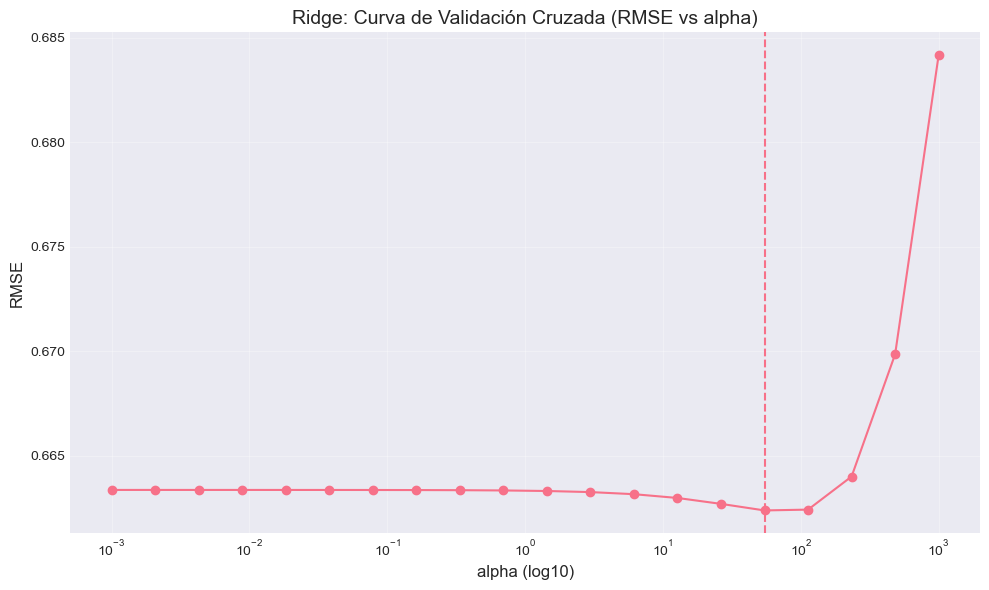

In [17]:
# TODO: Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha
# Tu código aquí
# === Visualización: RMSE vs alpha (de CV) ===

plt.figure(figsize=(10, 6))
# Completa el código para visualizar los resultados
cv_results = grid_search_ridge.cv_results_
alphas_tried = cv_results['param_alpha'].data.astype(float)
mean_rmse = np.sqrt(-cv_results['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.semilogx(alphas_tried, mean_rmse, marker='o')
plt.axvline(best_alpha_grid, linestyle='--')
plt.xlabel('alpha (log10)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Ridge: Curva de Validación Cruzada (RMSE vs alpha)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Modelos de Regresión

### 5.1 Regresión Lineal Normal

In [18]:
# TODO: Implementa y entrena un modelo de regresión lineal
# Tu código aquí
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Métricas
mse_lr_train = mean_squared_error(y_train, y_pred_lr_train)
mse_lr_test = mean_squared_error(y_test, y_pred_lr_test)
rmse_lr_train = np.sqrt(mse_lr_train)
rmse_lr_test = np.sqrt(mse_lr_test)
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)
mae_lr_train = mean_absolute_error(y_train, y_pred_lr_train)
mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)

print("="*50)
print("REGRESIÓN LINEAL NORMAL (OLS)")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {lr_model.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_lr_train:.4f}")
print(f"  R²: {r2_lr_train:.4f}")
print(f"  MAE: {mae_lr_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_lr_test:.4f}")
print(f"  R²: {r2_lr_test:.4f}")
print(f"  MAE: {mae_lr_test:.4f}")

REGRESIÓN LINEAL NORMAL (OLS)

Coeficientes:
  fixed acidity: 0.039789
  volatile acidity: -0.179439
  citric acid: -0.027512
  residual sugar: 0.009421
  chlorides: -0.089084
  free sulfur dioxide: 0.058015
  total sulfur dioxide: -0.120008
  density: -0.019204
  pH: -0.060610
  sulphates: 0.146815
  alcohol: 0.296628

Intercepto: 5.623925

Métricas en Entrenamiento:
  RMSE: 0.6513
  R²: 0.3480
  MAE: 0.4996

Métricas en Prueba:
  RMSE: 0.6245
  R²: 0.4032
  MAE: 0.5035


### 5.2 Ridge Regression con mejor alpha de CV

In [19]:
# TODO: Entrena Ridge con el mejor alpha encontrado por validación cruzada
# Tu código aquí
ridge_model = Ridge(alpha=best_alpha_ridge)
ridge_model.fit(X_train_scaled, y_train)
    
y_pred_train = ridge_model.predict(X_train_scaled)
y_pred_test = ridge_model.predict(X_test_scaled)

# Predicciones y métricas
mse_r_train = mean_squared_error(y_train, y_pred_train)
mse_r_test = mean_squared_error(y_test, y_pred_test)
rmse_r_train = np.sqrt(mse_r_train)
rmse_r_test = np.sqrt(mse_r_test)
r2_r_train = r2_score(y_train, y_pred_train)
r2_r_test = r2_score(y_test, y_pred_test)
mae_r_train = mean_absolute_error(y_train, y_pred_train)
mae_r_test = mean_absolute_error(y_test, y_pred_test)

print("="*50)
print("REGRESIÓN RIDGE CON MEJOR ALPHA DE CV")
print("="*50)
print(f"\nCoeficientes:")
for feature, coef in zip(X.columns, ridge_model.coef_):
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto: {ridge_model.intercept_:.6f}")
print(f"\nMétricas en Entrenamiento:")
print(f"  RMSE: {rmse_r_train:.4f}")
print(f"  R²: {r2_r_train:.4f}")
print(f"  MAE: {mae_r_train:.4f}")
print(f"\nMétricas en Prueba:")
print(f"  RMSE: {rmse_r_test:.4f}")
print(f"  R²: {r2_r_test:.4f}")
print(f"  MAE: {mae_r_test:.4f}")

REGRESIÓN RIDGE CON MEJOR ALPHA DE CV

Coeficientes:
  fixed acidity: 0.053924
  volatile acidity: -0.165477
  citric acid: -0.005283
  residual sugar: 0.016327
  chlorides: -0.084597
  free sulfur dioxide: 0.045440
  total sulfur dioxide: -0.108913
  density: -0.046036
  pH: -0.039036
  sulphates: 0.140600
  alcohol: 0.263942

Intercepto: 5.623925

Métricas en Entrenamiento:
  RMSE: 0.6520
  R²: 0.3466
  MAE: 0.5019

Métricas en Prueba:
  RMSE: 0.6265
  R²: 0.3994
  MAE: 0.5067


### 5.3 Lasso Regression con validación cruzada

In [20]:
# TODO: Implementa LassoCV para encontrar el mejor alpha automáticamente
# Tu código aquí
alphas_lasso = np.logspace(-3, 1, 100) 
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.alpha_
coef_lasso = pd.Series(lasso_cv.coef_, index=X.columns)

y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test  = lasso_cv.predict(X_test_scaled)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test  = np.sqrt(mean_squared_error(y_test,  y_pred_lasso_test))
r2_lasso_train   = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test    = r2_score(y_test,  y_pred_lasso_test)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

print(f"Mejor alpha para Lasso: {best_alpha_lasso:.6f}")
print(f"Número de características seleccionadas: {(coef_lasso != 0).sum()}")

# Predicciones y métricas
print("="*50)
print("REGRESIÓN LASSO CON VALIDACIÓN CRUZADA")
print("="*50)

print("\nCoeficientes (Lasso):")
for feature, coef in coef_lasso.items():
    print(f"  {feature}: {coef:.6f}")
print(f"\nIntercepto (Lasso): {lasso_cv.intercept_:.6f}")

print("\nMétricas en Entrenamiento (Lasso):")
print(f"  RMSE: {rmse_lasso_train:.4f}")
print(f"  R²  : {r2_lasso_train:.4f}")
print(f"  MAE : {mae_lasso_train:.4f}")
print("\nMétricas en Prueba (Lasso):")
print(f"  RMSE: {rmse_lasso_test:.4f}")
print(f"  R²  : {r2_lasso_test:.4f}")
print(f"  MAE : {mae_lasso_test:.4f}")

Mejor alpha para Lasso: 0.008498
Número de características seleccionadas: 8
REGRESIÓN LASSO CON VALIDACIÓN CRUZADA

Coeficientes (Lasso):
  fixed acidity: 0.009743
  volatile acidity: -0.171165
  citric acid: -0.000000
  residual sugar: 0.000000
  chlorides: -0.080162
  free sulfur dioxide: 0.035793
  total sulfur dioxide: -0.100195
  density: -0.000000
  pH: -0.051761
  sulphates: 0.133200
  alcohol: 0.298733

Intercepto (Lasso): 5.623925

Métricas en Entrenamiento (Lasso):
  RMSE: 0.6522
  R²  : 0.3462
  MAE : 0.5015

Métricas en Prueba (Lasso):
  RMSE: 0.6266
  R²  : 0.3991
  MAE : 0.5071


In [21]:
# TODO: Identifica qué características fueron eliminadas por Lasso
# Tu código aquí
print("Características eliminadas por Lasso:")
print(coef_lasso[coef_lasso == 0].index.tolist())

Características eliminadas por Lasso:
['citric acid', 'residual sugar', 'density']


## 6. Comparación de Modelos

In [22]:
# TODO: Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test
# Tu código aquí
comparison_data = {
    'Modelo': ['Linear Regression', f'Ridge (α={best_alpha_ridge})', f'Lasso (α={best_alpha_lasso})'],
    'RMSE Train': [rmse_lr_train, rmse_r_train, rmse_lasso_train],
    'RMSE Test': [rmse_lr_test, rmse_r_test, rmse_lasso_test],
    'R² Train': [r2_lr_train, r2_r_train, r2_lasso_train],
    'R² Test': [r2_lr_test, r2_r_test, r2_lasso_test],
    'MAE Test': [mae_lr_test, mae_r_test, mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")
print("="*70)
print(comparison_df.to_string(index=False))

# Identificar el mejor modelo
best_model_idx = comparison_df['RMSE Test'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Modelo']
print(f"\n🏆 Mejor modelo basado en RMSE de prueba: {best_model_name}")


COMPARACIÓN DE MODELOS
                        Modelo  RMSE Train  RMSE Test  R² Train  R² Test  MAE Test
             Linear Regression    0.651300   0.624520  0.347993 0.403180  0.503530
   Ridge (α=93.26033468832199)    0.652017   0.626472  0.346556 0.399443  0.506719
Lasso (α=0.008497534359086447)    0.652170   0.626642  0.346250 0.399117  0.507139

🏆 Mejor modelo basado en RMSE de prueba: Linear Regression


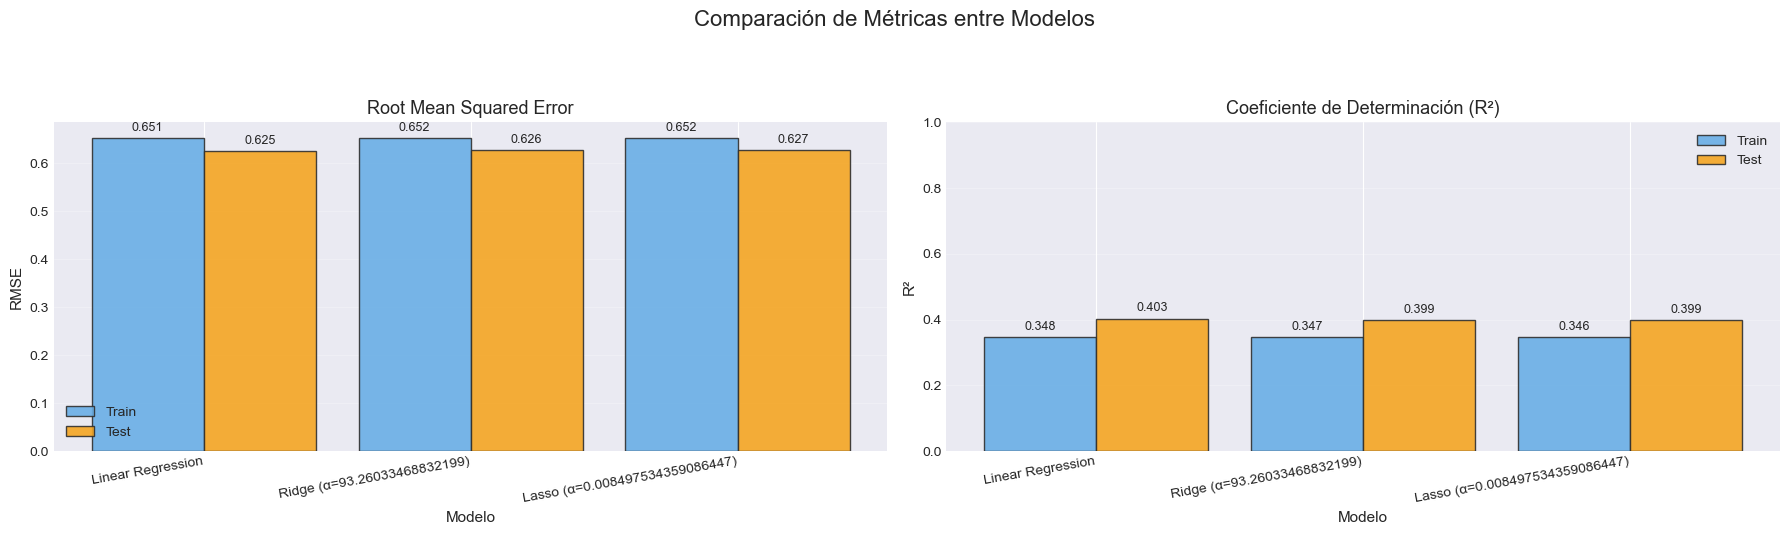

In [23]:
# TODO: Crea visualizaciones para comparar los modelos
# 1. Gráfico de barras comparando RMSE
# 2. Gráfico de barras comparando R²
# Tu código aquí
# ===== Gráficas comparativas (formato mejorado, misma lógica) =====
fig, axes = plt.subplots(1, 2, figsize=(18, 5))
fig.suptitle('Comparación de Métricas entre Modelos', fontsize=16, y=1.06)

models = comparison_df['Modelo'].tolist()
x_pos = np.arange(len(models))
width = 0.42

# Paleta y estilo
train_color = '#6AAFE6'   # azul suave
test_color  = '#F5A623'   # naranja suave
edge_color  = '#2F2F2F'

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# ---------- RMSE ----------
ax1 = axes[0]
bars1 = ax1.bar(x_pos - width/2, comparison_df['RMSE Train'], width,
                label='Train', color=train_color, edgecolor=edge_color, alpha=0.9)
bars2 = ax1.bar(x_pos + width/2, comparison_df['RMSE Test'],  width,
                label='Test',  color=test_color,  edgecolor=edge_color, alpha=0.9)
ax1.set_xlabel('Modelo', fontsize=11)
ax1.set_ylabel('RMSE', fontsize=11)
ax1.set_title('Root Mean Squared Error', fontsize=13)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(models, rotation=10, ha='right')
ax1.legend(frameon=False)
ax1.grid(True, alpha=0.25, axis='y')

# Etiquetas numéricas encima de barras
for bars in (bars1, bars2):
    for b in bars:
        ax1.annotate(f'{b.get_height():.3f}',
                     xy=(b.get_x() + b.get_width()/2, b.get_height()),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', fontsize=9)

# ---------- R² ----------
ax2 = axes[1]
bars3 = ax2.bar(x_pos - width/2, comparison_df['R² Train'], width,
                label='Train', color=train_color, edgecolor=edge_color, alpha=0.9)
bars4 = ax2.bar(x_pos + width/2, comparison_df['R² Test'],  width,
                label='Test',  color=test_color,  edgecolor=edge_color, alpha=0.9)
ax2.set_xlabel('Modelo', fontsize=11)
ax2.set_ylabel('R²', fontsize=11)
ax2.set_title('Coeficiente de Determinación (R²)', fontsize=13)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(models, rotation=10, ha='right')
ax2.legend(frameon=False)
ax2.grid(True, alpha=0.25, axis='y')
ax2.set_ylim([0, 1])

for bars in (bars3, bars4):
    for b in bars:
        ax2.annotate(f'{b.get_height():.3f}',
                     xy=(b.get_x() + b.get_width()/2, b.get_height()),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', fontsize=9)


plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


## 7. Análisis de Residuos

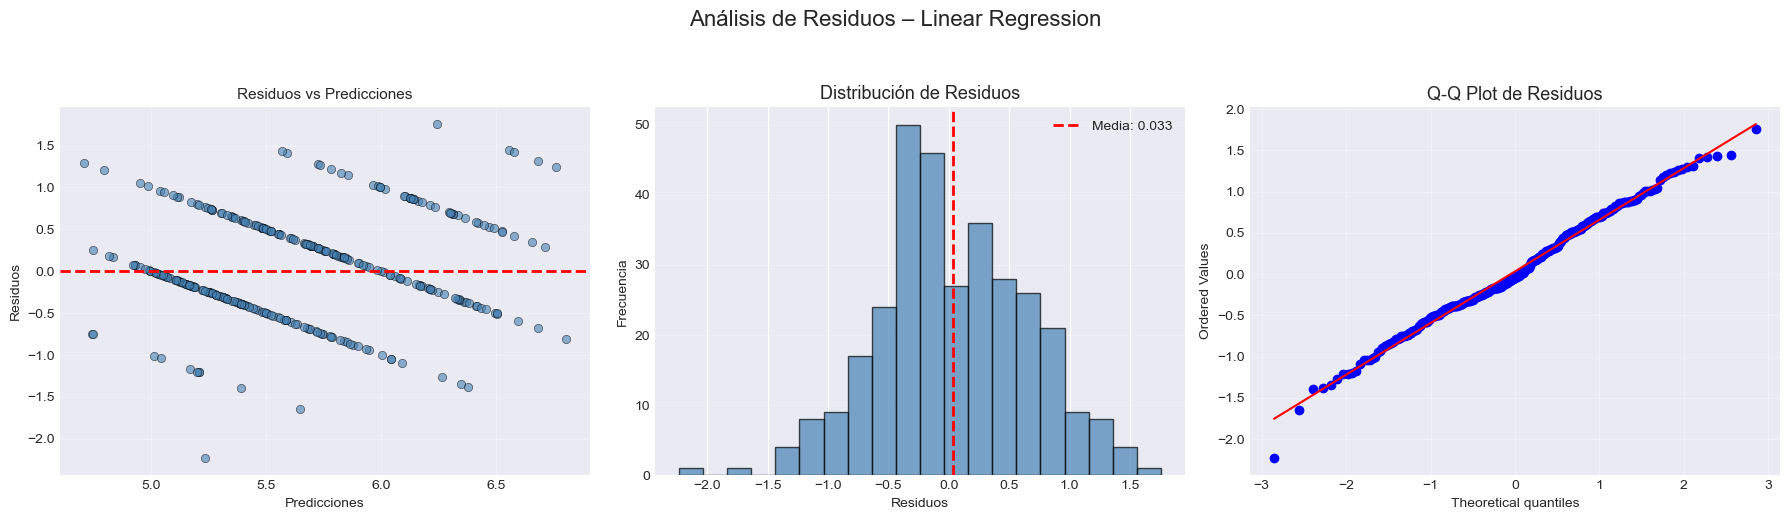

In [24]:
# TODO: Para el mejor modelo, crea:
# 1. Gráfico de residuos vs predicciones
# 2. Histograma de residuos
# 3. Q-Q plot de residuos
# Tu código aquí
# === 7. Análisis de Residuos (solo Linear Regression) ===
residuals_lr = y_test - y_pred_lr_test

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de Residuos – Linear Regression', fontsize=16, y=1.03)

color = 'steelblue'

# 1) Residuos vs Predicciones
ax1 = axes[0]
ax1.scatter(y_pred_lr_test, residuals_lr, alpha=0.6, color=color, edgecolors='black', linewidth=0.5)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Predicciones', fontsize=10)
ax1.set_ylabel('Residuos', fontsize=10)
ax1.set_title('Residuos vs Predicciones', fontsize=11)
ax1.grid(True, alpha=0.3)

# 2) Histograma de Residuos
ax2 = axes[1]
ax2.hist(residuals_lr, bins=20, edgecolor='black', alpha=0.7, color=color)
ax2.set_xlabel('Residuos', fontsize=10)
ax2.set_ylabel('Frecuencia', fontsize=10)
ax2.set_title('Distribución de Residuos', fontsize=13)
ax2.grid(True, alpha=0.3, axis='y')
mean_resid = residuals_lr.mean()
ax2.axvline(mean_resid, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_resid:.3f}')
ax2.legend(frameon=False)

# 3) Q-Q Plot de Residuos
ax3 = axes[2]
stats.probplot(residuals_lr, dist="norm", plot=ax3)
ax3.set_title('Q-Q Plot de Residuos', fontsize=13)
ax3.grid(True, alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

## 8. Importancia de Características

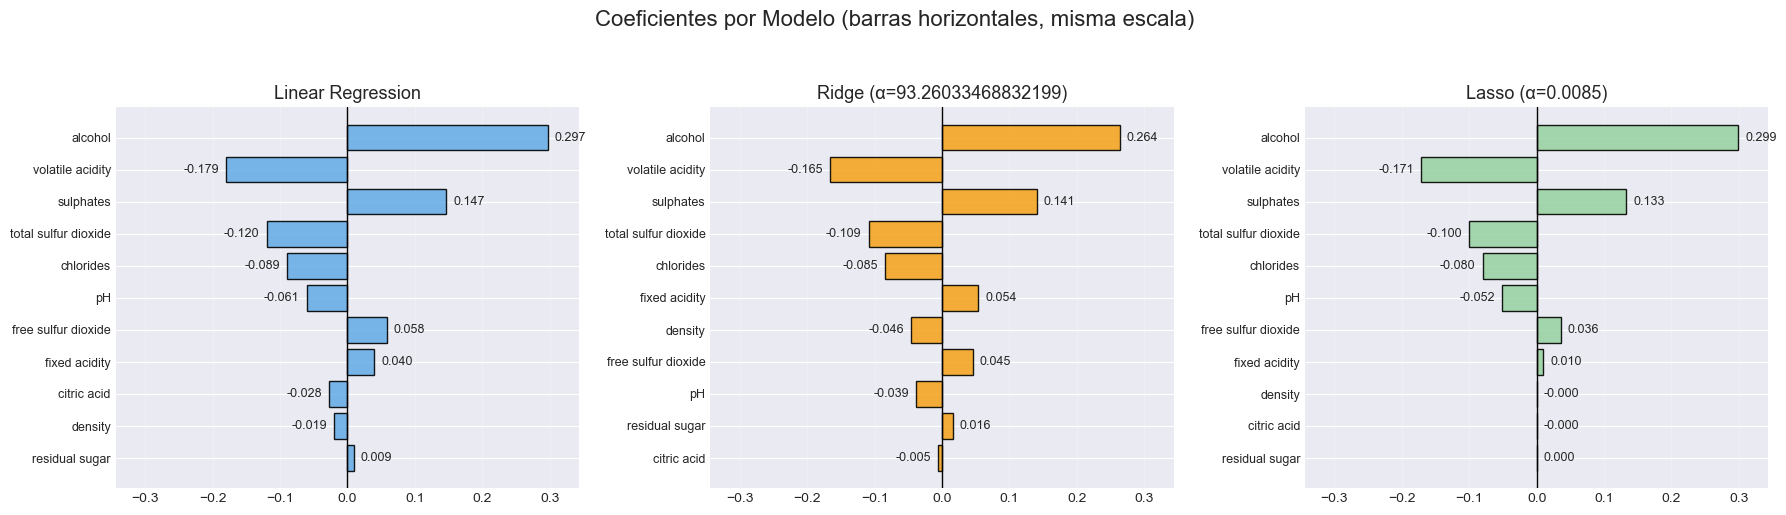

In [25]:
# TODO: Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes
# Tu código aquí
coef_lr    = pd.Series(lr_model.coef_,    index=X.columns, name='Linear')
coef_ridge = pd.Series(ridge_model.coef_, index=X.columns, name='Ridge')
coef_lasso = pd.Series(lasso_cv.coef_,    index=X.columns, name='Lasso')

def prep_df(series):
    df = series.to_frame('coef').copy()
    df['abs'] = df['coef'].abs()
    df = df.sort_values('abs', ascending=True)
    return df

df_lr    = prep_df(coef_lr)
df_ridge = prep_df(coef_ridge)
df_lasso = prep_df(coef_lasso)

xmax = np.max([
    df_lr['abs'].max(),
    df_ridge['abs'].max(),
    df_lasso['abs'].max()
]) * 1.15 

fig, axes = plt.subplots(1, 3, figsize=(18, max(5, 0.45*len(X.columns))))
fig.suptitle('Coeficientes por Modelo (barras horizontales, misma escala)', fontsize=16, y=1.02)

def plot_model(ax, df, title, color='#6AAFE6'):
    ax.barh(df.index, df['coef'], color=color, edgecolor='black', alpha=0.9)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_title(title, fontsize=13)
    ax.set_xlim(-xmax, xmax)
    ax.grid(True, axis='x', alpha=0.25)
    for y, v in zip(df.index, df['coef']):
        ax.annotate(f'{v:.3f}',
                    xy=(v, y),
                    xytext=(5 if v >= 0 else -5, 0),
                    textcoords='offset points',
                    ha='left' if v >= 0 else 'right',
                    va='center', fontsize=9)

plot_model(axes[0], df_lr,    'Linear Regression',   color='#6AAFE6')
plot_model(axes[1], df_ridge, f'Ridge (α={getattr(ridge_model, "alpha", "best")})', color='#F5A623')
plot_model(axes[2], df_lasso, f'Lasso (α={lasso_cv.alpha_:.4f})',   color='#9CD3A5')

for ax in axes:
    ax.tick_params(axis='y', labelsize=9)
    ax.spines[['top', 'right']].set_visible(False)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## 9. Validación Cruzada Final del Mejor Modelo

In [26]:
# TODO: Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE
# Tu código aquí
# === 9. Validación Cruzada Final del Mejor Modelo (Linear Regression) ===
def manual_cross_validation_linear(X, y, n_folds=10, random_state=42):
    """
    Validación cruzada manual para Linear Regression con estandarización dentro de cada fold.
    Devuelve media, desviación estándar y el vector de RMSE por fold.
    """
    # Asegurar arrays para indexado por enteros
    X_np = X.values if hasattr(X, "values") else X
    y_ser = y if hasattr(y, "iloc") else pd.Series(y)

    kf = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    rmse_scores = []

    for train_idx, val_idx in kf.split(X_np):
        # Split
        X_train_cv, X_val_cv = X_np[train_idx], X_np[val_idx]
        y_train_cv, y_val_cv = y_ser.iloc[train_idx], y_ser.iloc[val_idx]

        # Estandarizar SOLO con train del fold
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled   = scaler_cv.transform(X_val_cv)

        # Entrenar Linear Regression (fit_intercept=True por defecto)
        lr = LinearRegression()
        lr.fit(X_train_cv_scaled, y_train_cv)

        # Evaluar
        y_pred = lr.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        rmse_scores.append(rmse)

    rmse_scores = np.array(rmse_scores)
    return rmse_scores.mean(), rmse_scores.std(), rmse_scores

# Ejecutar CV manual (10 folds)
mean_rmse_lr, std_rmse_lr, rmse_folds_lr = manual_cross_validation_linear(X, y, n_folds=10)
print("Validación Cruzada (Manual) - Linear Regression")
print(f"RMSE CV (10 folds)  -> media: {mean_rmse_lr:.4f} | std: {std_rmse_lr:.4f}")
print(f"RMSE por fold: {np.round(rmse_folds_lr, 4)}")

Validación Cruzada (Manual) - Linear Regression
RMSE CV (10 folds)  -> media: 0.6509 | std: 0.0441
RMSE por fold: [0.6194 0.6296 0.6751 0.6771 0.6805 0.7068 0.6567 0.6932 0.5514 0.6189]


## 10. Conclusiones y Preguntas de Reflexión

### Preguntas para responder:

1. **¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?**
   - Tu respuesta: El modelo de regresión lineal (OLS) obtuvo el menor RMSE y el mayor $R^2$ en el conjunto de prueba y también tuvo el mejor desempeño en la validación cruzada, aunque la diferencia entre los valores de esta y las regresiones Lasso y Ridge fue bastante baja. Creo que fue así porque la relación entre las variables químicas y físicas del vino parecen tener una relación relativamente simple con la calidad, por lo que esta se puede capturar razonablemente bien con un modelo lineal sin una penalización fuerte.

2. **¿Qué características son las más importantes para predecir la calidad del vino?**
   - Tu respuesta: De acuerdo a la matriz de correlaciones y los coeficientes, las variables más importantes fueron:
      - alcohol: indica que mayor contenido alcohólico se asocia con mayor calidad.
      - volatile acidity: acidez volátil alta se asocia con menor calidad, puede verse como un defecto.
      - sulphates: más sulfatos sugieren una mayor calidad del vino al dar ciertas propiedades de sabor.

3. **¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?**
   - Tu respuesta: No hay señales claras de sobreajuste, ya que los valores de RMSE en los conjuntos de "train" y "test" son bastante similares para todos los modelos. Además, el gráfico de residuos para el modelo lineal muestra dispersión alrededor de cero, sin patrones o colas extremas que indiquen claramente un sobreajuste.

4. **¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?**
   - Tu respuesta: En Ridge, la gráfica RMSE vs alpha mostró un mínimo relativamente plano, y este mejor alpha casi iguala el valor de OLS, lo que indica que la regularización no era tan importante para estos datos.
   
   En Lasso, al incrementar alpha algunos coeficientes se reducen a cero, pero las variables que indican precisión tuvieron valores muy similares a las de Ridge y OLS, por lo que no hubo tanto beneficio en cuanto a precisión.

5. **¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?**
   - Tu respuesta: 
      - Estimación del error con menor varianza.
      - Evita usar el set de prueba para decidir parámetros, lo preserva para la evaluación final.
      - Facilita comparar parámetros con criterios como RMSE o MAE mínimo.

6. **Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?**
   - Tu respuesta: En este caso, los resultados del modelo Lasso no fueron mejores que los resultados originales obtenidos con la regresión lineal normal, por lo que podría decirse que dejó el modelo igual o lo empeoró ligeramente, ya que es posible que las variables eliminadas aún explicaran cierta parte de la variación del modelo. No obstante, Lasso pudo mejorar la simplicidad del modelo, ya que se deshizo de las variables menos relevantes.

7. **¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?**
   - Tu respuesta:
      - Incluir interacciones relevantes (ej., alcohol × pH).
      - Transformaciones lineales o no lineales.
      - Utilizar modelos no necesariamente lineales para pronósticos.
      - Análisis y limpieza de datos para eliminar outliers o datos que afecten negativamente los resultados.

## Ejercicio Extra: Ingeniería de Características

### Desafío:
Intenta mejorar el rendimiento del modelo creando nuevas características:

1. Crea interacciones entre variables (ej: alcohol × pH)
2. Crea características polinomiales
3. Agrupa la calidad en categorías (baja: 3-4, media: 5-6, alta: 7-8) y úsala como característica
4. Crea ratios entre características relacionadas

In [27]:
# TODO: Implementa ingeniería de características y evalúa si mejora el modelo
# Tu código aquí
